In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df= pd.read_csv("C:/Users/Home/Desktop/Intellipath/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
587,8752-IMQOS,Male,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,85.1,No
6046,2959-FENLU,Female,0,No,No,9,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.30,781.4,No
5272,8780-IXSTS,Female,0,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.10,521.3,Yes
2269,0151-ONTOV,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.90,70.9,Yes
2890,1732-VHUBQ,Female,1,Yes,Yes,47,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.55,3309.25,Yes


In [62]:
df.drop('customerID',axis = 'columns',inplace= True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [63]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [64]:
df.MonthlyCharges.values


array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [65]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [66]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [67]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [68]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [69]:
df1.TotalCharges =  pd.to_numeric(df1.TotalCharges)

C:\Users\Home\AppData\Local\Temp/ipykernel_22188/3855967245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges =  pd.to_numeric(df1.TotalCharges)


In [70]:
df1.TotalCharges.dtypes

dtype('float64')

In [71]:
tenure_chur_no = df[df.Churn=='No'].tenure
tenure_chur_yes = df[df.Churn=='Yes'].tenure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


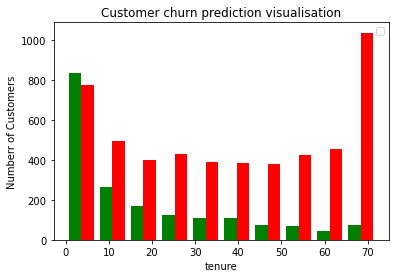

In [72]:
plt.xlabel("tenure")
plt.ylabel("Numberr of Customers")
plt.title("Customer churn prediction visualisation")
plt.hist([tenure_chur_yes,tenure_chur_no],color=['green','red'])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


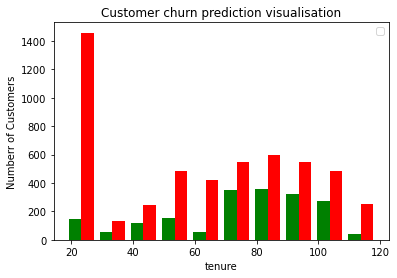

In [73]:
Monthly_charges_chur_no = df[df.Churn=='No'].MonthlyCharges 
Monthly_Charges_chur_yes = df[df.Churn=='Yes'].MonthlyCharges 

plt.xlabel("tenure")
plt.ylabel("Numberr of Customers")
plt.title("Customer churn prediction visualisation")
plt.hist([Monthly_Charges_chur_yes,Monthly_charges_chur_no],color=['green','red'])
plt.legend()

In [74]:
def print_uniquec_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [75]:
print_uniquec_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [76]:
df1 = df1.replace('No internet service','No')
df1 = df1.replace('No phone service','No')

In [77]:
print_uniquec_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [78]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
               'OnlineBackup','DeviceProtection','DeviceProtection','StreamingTV','StreamingMovies',
               'PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace = True)
    

In [79]:
df1['gender'].replace({'Female':1,'Male':0},inplace =True)

In [80]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [81]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [82]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
20,0,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4910,1,0,0,0,30,1,0,1,1,1,...,1,0,0,0,1,0,1,0,0,0
6540,1,0,0,0,34,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
6614,0,0,1,1,71,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6673,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [83]:
df2.shape

(7032, 27)

In [84]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [85]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3758,1,0,0,0,0.000000,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
4534,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3904,0,0,1,1,0.464789,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6268,1,0,0,0,0.295775,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2051,1,0,1,1,0.957746,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [86]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)


In [88]:
X_train.shape

(5625, 26)

In [89]:
y_train.shape

(5625,)

In [90]:
X_test.shape

(1407, 26)

In [91]:
len(X_train.columns)

26

In [102]:
yes_no_columns2=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
               'OnlineBackup','DeviceProtection','DeviceProtection','StreamingTV','StreamingMovies',
               'PaperlessBilling']

In [104]:
X=X_train[yes_no_columns2].to_list()



AttributeError: 'DataFrame' object has no attribute 'to_list'

In [100]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,),activation = 'relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(X,y_train,epochs=5)

NameError: name 'X' is not defined

In [52]:
model.evaluate(X_test,y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [53]:
yp = model.predict(X_test)
yp[:5]

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).